In [1]:
!pip install geopandas paxplot -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

seq_cmap = 'Purples'

adult_df = pd.read_csv('adult.data',header=None)
adult_df.head(15)
# adult_df.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
test_df = pd.read_csv('adult.data',header=None)
test_df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
#test_df[13] = test_df[13].apply(lambda x : x.strip() if x.strip() != '?' else None)
for i in range(len(test_df.columns)):
    test_df[test_df.columns[i]] = test_df[test_df.columns[i]].apply(lambda x: str(x).strip() if str(x).strip() != '?' else None)
    test_df['education_num'] = test_df['education_num'].astype(int)
test_df.head() 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# 1.	How salaries are varying with age
# 2.	Is education key driver for the salaries
# 3.	How different occupations offers different salaries
# 4.	How race, ethnicity and native countries play a key role in deciding salaries
# 5.	How gender and marital status can be used in combination to determine the salaries of a person
# 6.	How occupation, hours per week, age can be used all together to determine the salaries..

<Axes: title={'center': 'Salary w.r.t. Age'}, xlabel='age', ylabel='Number of people'>

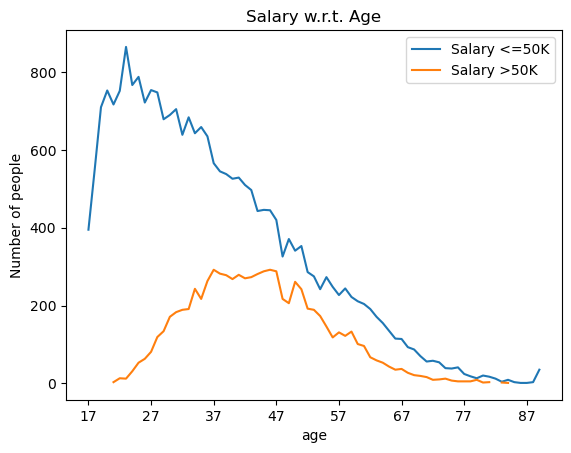

In [5]:
# test_df.groupby('income', dropna=True).age.hist(figsize=(15,8))
# pyplot.xticks(rotation='vertical')

df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby('age').count().income
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby('age').count().income

res = pd.merge(df1, df2, how='left', on='age')
res.rename(columns={'income_x': 'Salary <=50K', 'income_y': 'Salary >50K'}, inplace=True)
res.plot(ylabel='Number of people', title='Salary w.r.t. Age')

In [6]:
temp = test_df[['education', 'education_num']].groupby(['education', 'education_num']).nunique()
temp.sort_values(['education_num'])

,
education,education_num
Preschool,1
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
10th,6
11th,7
12th,8
HS-grad,9


<Axes: title={'center': 'Salaries w.r.t. Education'}, xlabel='Education Levels', ylabel='Number of people'>

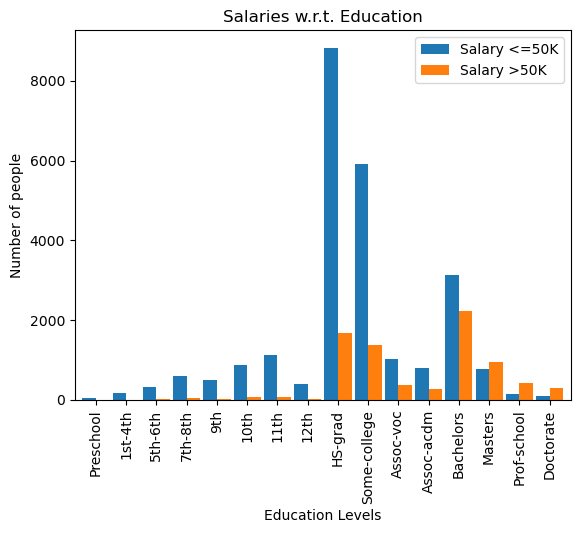

In [7]:
df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['education', 'education_num']).count().income
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['education', 'education_num']).count().income

res = pd.merge_ordered(df1, df2, how='left', on=['education', 'education_num'])
res.rename(columns={'income_x': 'Salary <=50K', 'income_y': 'Salary >50K'}, inplace=True)
res.sort_values('education_num', inplace=True)
res.plot.bar(x="education", y=['Salary <=50K', 'Salary >50K'], width=0.9, xlabel='Education Levels', ylabel='Number of people', title='Salaries w.r.t. Education') 

<Axes: title={'center': 'Salaries w.r.t. Occupation'}, xlabel='Number of people', ylabel='Occupations'>

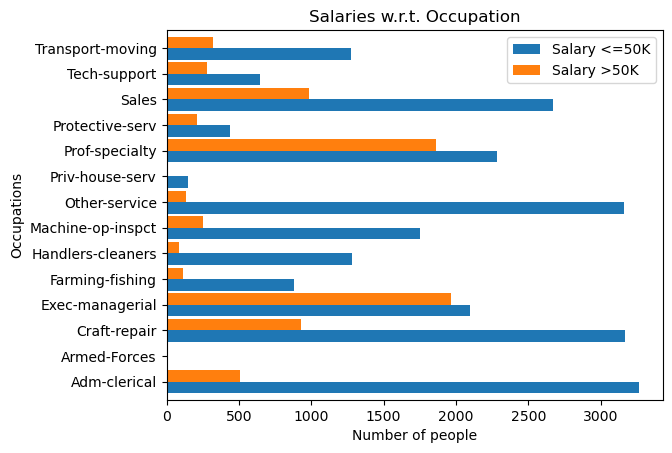

In [8]:
df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['occupation']).count().income
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['occupation']).count().income

res = pd.merge_ordered(df1, df2, how='left', on=['occupation'])
res.rename(columns={'income_x': 'Salary <=50K', 'income_y': 'Salary >50K'}, inplace=True)
res.plot.barh(x="occupation", y=['Salary <=50K', 'Salary >50K'], width=0.9, ylabel='Occupations', xlabel='Number of people', title='Salaries w.r.t. Occupation') 

<Axes: title={'center': 'Salaries w.r.t. workclass'}, xlabel='workclass', ylabel='Number of people'>

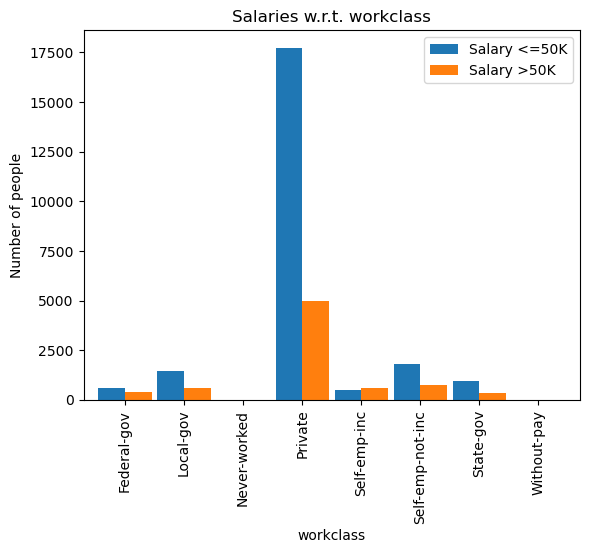

In [9]:
df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['workclass']).count().income
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['workclass']).count().income

res = pd.merge_ordered(df1, df2, how='left', on=['workclass'])
res.rename(columns={'income_x': 'Salary <=50K', 'income_y': 'Salary >50K'}, inplace=True)
res.plot(x="workclass", y=['Salary <=50K', 'Salary >50K'], kind="bar", width=0.9, xlabel='workclass', ylabel='Number of people', title='Salaries w.r.t. workclass') 

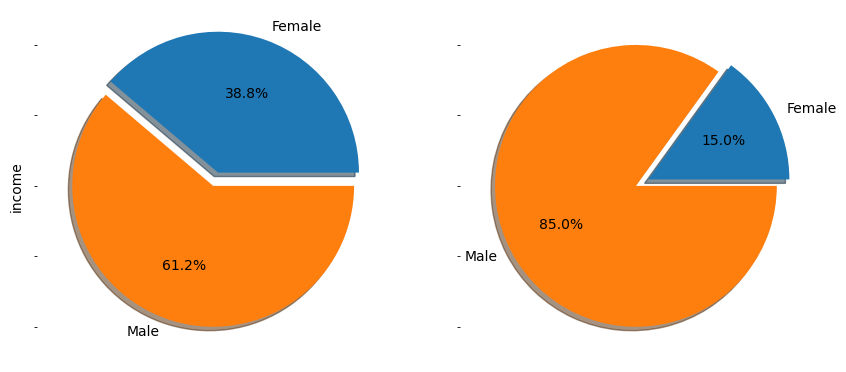

In [10]:
df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['sex']).count().income
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['sex']).count().income

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
df1.plot.pie(explode=[0.1,0], ax=ax1, autopct='%1.1f%%', shadow=True)
df2.plot.pie(explode=[0.1,0], ax=ax2, autopct='%1.1f%%', shadow=True)
plt.show()



In [11]:
df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['relationship']).count().income
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['relationship']).count().income


<Axes: >

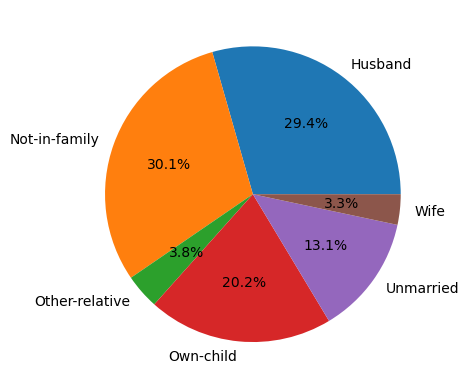

In [12]:
df1.plot.pie(autopct='%1.1f%%', ylabel='')

<Axes: >

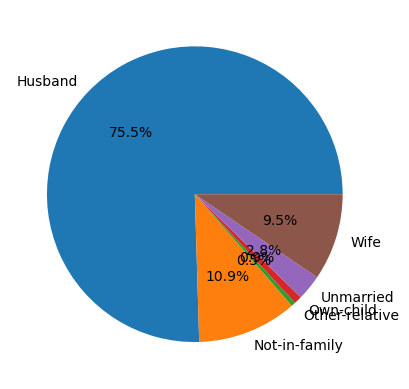

In [13]:

df2.plot.pie(autopct='%1.1f%%', ylabel='')

Text(0.5, 1.0, 'Salaries w.r.t to workclass and occupation')

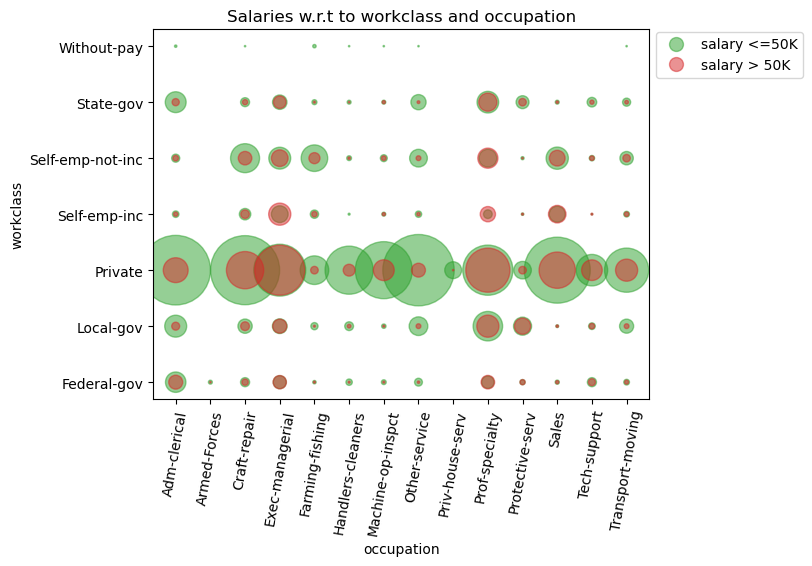

In [14]:
from matplotlib.lines import Line2D

df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['occupation', 'workclass']).count().income.reset_index()
df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['occupation', 'workclass']).count().income.reset_index()

fig, ax = plt.subplots()
df1.plot.scatter(x='occupation', y = 'workclass', ax=ax, c='C2', s='income', alpha=0.5, rot=80, label='x')
df2.plot.scatter(x='occupation', y = 'workclass', ax=ax, c='C3', s='income', alpha=0.5, rot=80, label='y')
h1 = Line2D([0], [0], marker='o', markersize=5, color='C2', linestyle='None', alpha=0.5)
h2 = Line2D([0], [0], marker='o', markersize=5, color='C3', linestyle='None', alpha=0.5)

ax.legend([h1, h2], ['salary <=50K', 'salary > 50K'], markerscale=2, bbox_to_anchor=(1, .85))
ax.set_title('Salaries w.r.t to workclass and occupation')

In [15]:
chloro_df = test_df.copy()
chloro_df.replace(to_replace='Yugoslavia', value='Serbia', inplace=True)
chloro_df.replace(to_replace='Holand-Netherlands', value='Netherlands', inplace=True)
chloro_df.replace(to_replace='Outlying-US(Guam-USVI-etc)', value='United States of America', inplace=True)
chloro_df.replace(to_replace='United-States', value='United States of America', inplace=True)
chloro_df.replace(to_replace='Hong', value='China', inplace=True)
chloro_df.replace(to_replace='Scotland', value='United Kingdom', inplace=True)
chloro_df.replace(to_replace='England', value='United Kingdom', inplace=True)
chloro_df.replace(to_replace='Puerto-Rico', value='Puerto Rico', inplace=True)
chloro_df.replace(to_replace='Dominican-Republic', value='Dominican Republic', inplace=True)
chloro_df.replace(to_replace='Columbia', value='Colombia', inplace=True)
chloro_df.replace(to_replace='El-Salvador', value='El Salvador', inplace=True)
chloro_df.replace(to_replace='Trinadad&Tobago', value='Trinidad and Tobago', inplace=True)
chloro_df = chloro_df[chloro_df['native_country'] != 'United States of America']
# chloro_df_wo_usa = chloro_df_wo_usa[chloro_df_wo_usa['native_country'] != 'Mexico']
df1 = chloro_df[chloro_df['income'] == '<=50K'].groupby(['native_country']).count().income.reset_index()
df2 = chloro_df[chloro_df['income'] != '<=50K'].groupby(['native_country']).count().income.reset_index()


/var/folders/h8/_rqyw_pd2mxfqk7msgwcwsjc0000gp/T/ipykernel_71472/1503035116.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


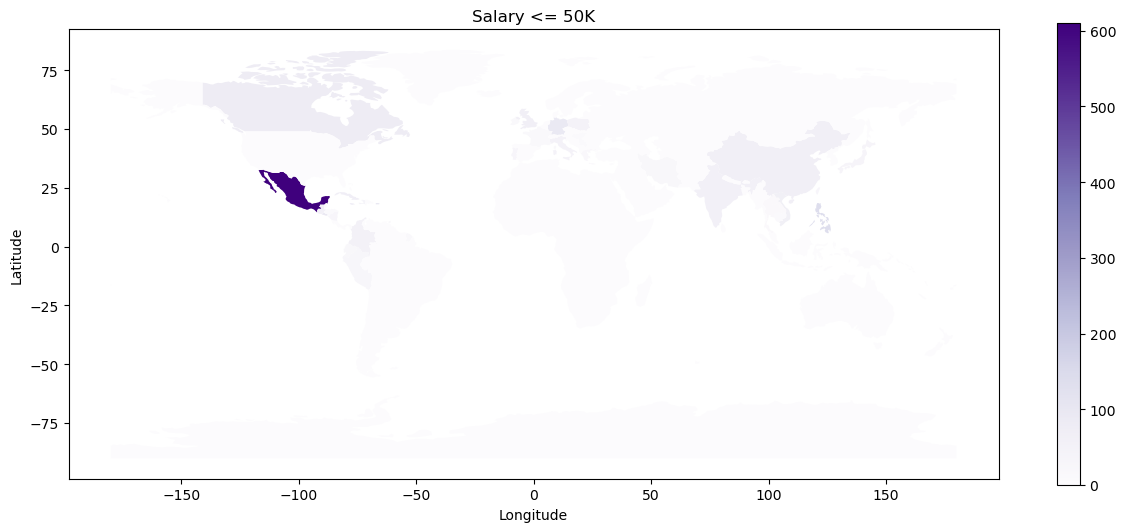

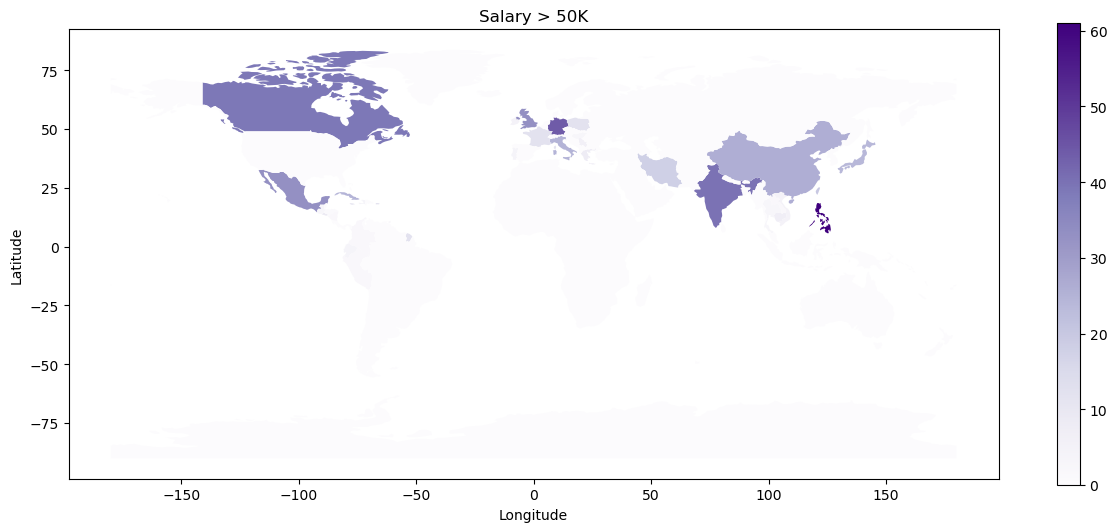

In [16]:
import geopandas as gpd

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_lower = world.merge(df1, left_on='name', right_on='native_country', how='left').fillna(0).sort_values(['income'], ascending=False)
merged_higher = world.merge(df2, left_on='name', right_on='native_country', how='left').fillna(0).sort_values(['income'], ascending=False)

# Create the choropleth plot
fig, ax = plt.subplots(figsize=(15, 6))
merged_lower.plot(column='income', ax=ax, legend=True, cmap='Purples')

# Set the title and labels
plt.title('Salary <= 50K')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

# Create the choropleth plot
fig, ax = plt.subplots(figsize=(15, 6))
merged_higher.plot(column='income', ax=ax, legend=True, cmap='Purples')

# Set the title and labels
plt.title('Salary > 50K')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

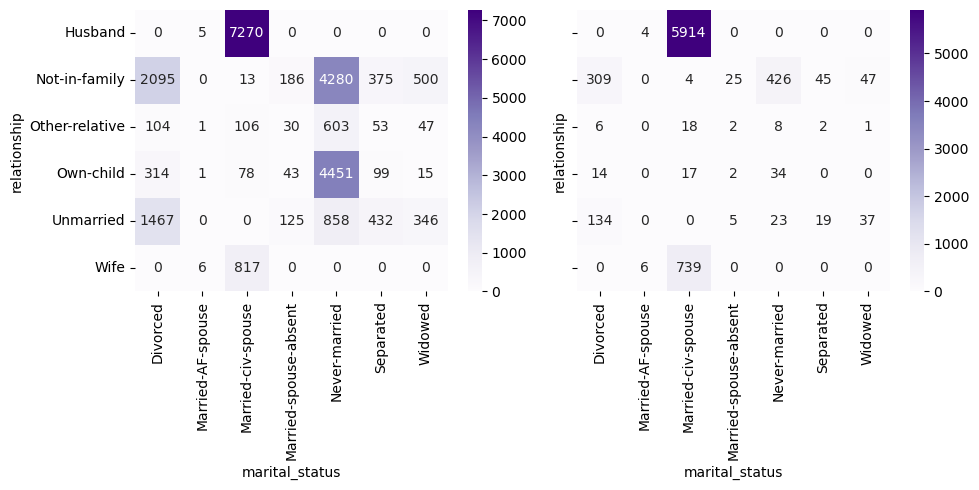

In [17]:
import seaborn as sn

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
df1 = test_df.copy()[test_df['income'] == '<=50K'].groupby(['relationship','marital_status']).count().income.reset_index()
data = df1.pivot_table(index='relationship', columns='marital_status', values='income')
sn.heatmap(data.fillna(0), annot=True, fmt="g", cmap='Purples', ax=ax1)

df2 = test_df.copy()[test_df['income'] != '<=50K'].groupby(['relationship','marital_status']).count().income.reset_index()
data2 = df2.pivot_table(index='relationship', columns='marital_status', values='income')
sn.heatmap(data2.fillna(0), annot=True, fmt="g", cmap='Purples', ax=ax2)
fig.tight_layout()
plt.show()

In [18]:
df1 = test_df.copy()[['workclass', 'occupation', 'income']]
df1

,workclass,occupation,income
0,State-gov,Adm-clerical,<=50K
1,Self-emp-not-inc,Exec-managerial,<=50K
2,Private,Handlers-cleaners,<=50K
3,Private,Handlers-cleaners,<=50K
4,Private,Prof-specialty,<=50K
...,...,...,...
32556,Private,Tech-support,<=50K
32557,Private,Machine-op-inspct,>50K
32558,Private,Adm-clerical,<=50K
32559,Private,Adm-clerical,<=50K


In [19]:
# from pandas.plotting import parallel_coordinates

# parallel_coordinates(df1.fillna('Unknown'), class_column='income', color=('#556270', '#4ECDC4'))
# plt.show()

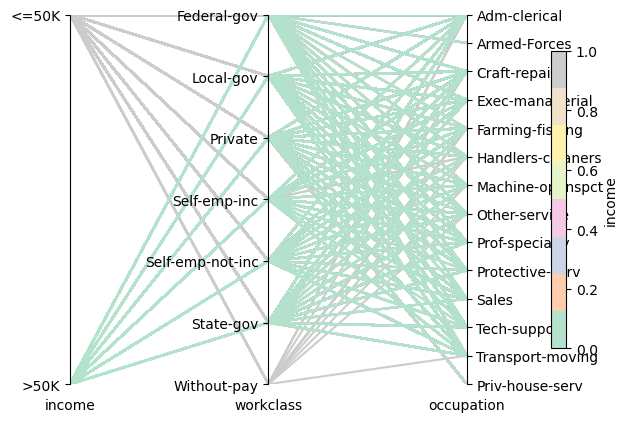

In [27]:
import paxplot

dfx = test_df.copy()[['income', 'workclass', 'occupation']].dropna()
dfx.sort_values(by=['income', 'workclass', 'occupation'], inplace=True)

cols = dfx.columns
paxfig = paxplot.pax_parallel(n_axes=len(cols))
paxfig.plot(dfx.to_numpy())
# Add labels
paxfig.set_labels(cols)

# Add colorbar
color_col = 0
paxfig.add_colorbar(
    ax_idx=color_col,
    cmap='Pastel2',
    colorbar_kwargs={'label': cols[color_col]}
)

plt.show()